In [77]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np


data: https://www.kaggle.com/datasets/aadimator/nyc-weather-2016-to-2022/data

In [78]:
data = pd.read_csv("NYC_Weather_2016_2022.csv")     # data from 2016-01-01 to 2022-10-25

crash_data = pd.read_csv("data_crash_dates.csv")

In [97]:
data

,time,temperature_2m (°C),precipitation (mm),rain (mm),cloudcover (%),cloudcover_low (%),cloudcover_mid (%),cloudcover_high (%),windspeed_10m (km/h),winddirection_10m (°)
0,2016-01-01 00:00:00,7.6,0.0,0.0,69.0,53.0,0.0,72.0,10.0,296.0
1,2016-01-01 01:00:00,7.5,0.0,0.0,20.0,4.0,0.0,56.0,9.8,287.0
2,2016-01-01 02:00:00,7.1,0.0,0.0,32.0,3.0,0.0,99.0,9.7,285.0
3,2016-01-01 03:00:00,6.6,0.0,0.0,35.0,5.0,0.0,100.0,9.2,281.0
4,2016-01-01 04:00:00,6.3,0.0,0.0,34.0,4.0,0.0,100.0,9.1,279.0
...,...,...,...,...,...,...,...,...,...,...
59755,2022-10-25 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59756,2022-10-25 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59757,2022-10-25 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59758,2022-10-25 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
data.columns

Index(['time', 'temperature_2m (°C)', 'precipitation (mm)', 'rain (mm)',
       'cloudcover (%)', 'cloudcover_low (%)', 'cloudcover_mid (%)',
       'cloudcover_high (%)', 'windspeed_10m (km/h)', 'winddirection_10m (°)'],
      dtype='object')

In [80]:
crash_data

,CRASH DATE,CRASH TIME,LOCATION,NUMBER OF PERSONS KILLED
0,09/11/2021,2:39,NaN,0.0
1,03/26/2022,11:45,NaN,0.0
2,06/29/2022,6:55,NaN,0.0
3,09/11/2021,9:35,"(40.667202, -73.8665)",0.0
4,12/14/2021,8:13,"(40.683304, -73.917274)",0.0
...,...,...,...,...
2128239,08/06/2024,20:39,NaN,0.0
2128240,08/06/2024,12:00,NaN,0.0
2128241,07/29/2024,2:30,"(40.723442, -73.93899)",0.0
2128242,08/02/2024,15:48,NaN,0.0


In [81]:
data["time"] = pd.to_datetime(data["time"])
crash_data["CRASH DATE"] = pd.to_datetime(crash_data["CRASH DATE"] + " " + crash_data["CRASH TIME"])

In [82]:
crash_data

,CRASH DATE,CRASH TIME,LOCATION,NUMBER OF PERSONS KILLED
0,2021-09-11 02:39:00,2:39,NaN,0.0
1,2022-03-26 11:45:00,11:45,NaN,0.0
2,2022-06-29 06:55:00,6:55,NaN,0.0
3,2021-09-11 09:35:00,9:35,"(40.667202, -73.8665)",0.0
4,2021-12-14 08:13:00,8:13,"(40.683304, -73.917274)",0.0
...,...,...,...,...
2128239,2024-08-06 20:39:00,20:39,NaN,0.0
2128240,2024-08-06 12:00:00,12:00,NaN,0.0
2128241,2024-07-29 02:30:00,2:30,"(40.723442, -73.93899)",0.0
2128242,2024-08-02 15:48:00,15:48,NaN,0.0


In [83]:
dates_with_rain = data[data["rain (mm)"] > 0]["time"].dt.date
dates_without_rain = data[data["rain (mm)"] == 0]["time"].dt.date

In [84]:
crashes_with_rain = crash_data[crash_data["CRASH DATE"].dt.date.isin(dates_with_rain)]
crashes_without_rain = crash_data[crash_data["CRASH DATE"].dt.date.isin(dates_without_rain)]

([<matplotlib.axis.XTick at 0x14293570d50>,
 [Text(0, 0, '0:00'),
  Text(1, 0, '1:00'),
  Text(2, 0, '2:00'),
  Text(3, 0, '3:00'),
  Text(4, 0, '4:00'),
  Text(5, 0, '5:00'),
  Text(6, 0, '6:00'),
  Text(7, 0, '7:00'),
  Text(8, 0, '8:00'),
  Text(9, 0, '9:00'),
  Text(10, 0, '10:00'),
  Text(11, 0, '11:00'),
  Text(12, 0, '12:00'),
  Text(13, 0, '13:00'),
  Text(14, 0, '14:00'),
  Text(15, 0, '15:00'),
  Text(16, 0, '16:00'),
  Text(17, 0, '17:00'),
  Text(18, 0, '18:00'),
  Text(19, 0, '19:00'),
  Text(20, 0, '20:00'),
  Text(21, 0, '21:00'),
  Text(22, 0, '22:00'),
  Text(23, 0, '23:00')])

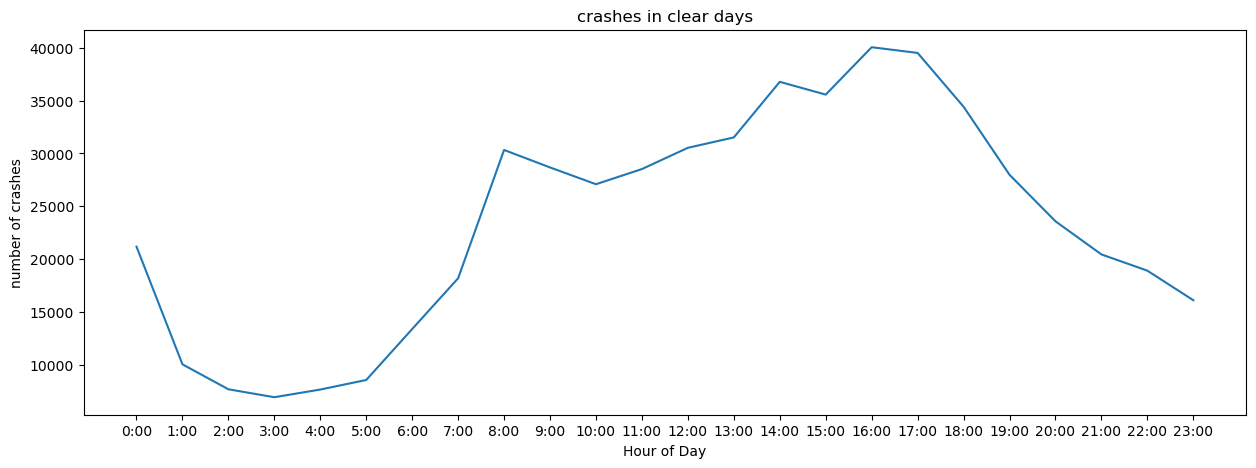

In [85]:
data_crashes = crashes_without_rain.groupby(crashes_with_rain["CRASH DATE"].dt.hour).count()

plt.figure(figsize=(15, 5))

plt.plot(data_crashes.index, data_crashes["CRASH DATE"])
plt.xlabel("Hour of Day")
plt.ylabel("number of crashes")
plt.title("crashes in clear days")
plt.xticks(range(0, 24), [f"{h}:00" for h in range(0, 24)])

### count of crashes and mean precipitation

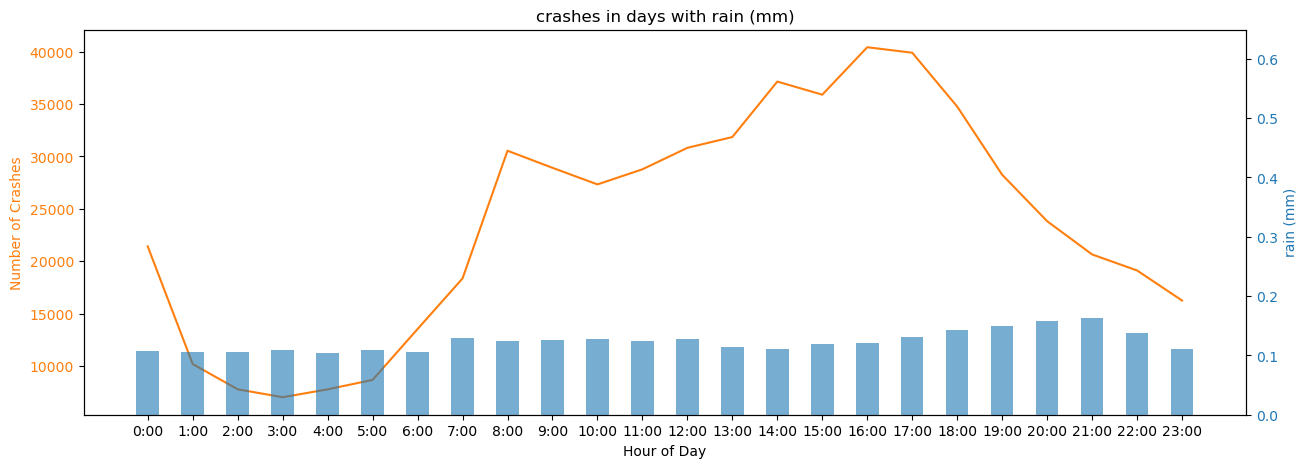

In [100]:
data_crashes = crashes_with_rain.groupby(crashes_with_rain["CRASH DATE"].dt.hour).count()
precipitation_h_data = data.groupby(data["time"].dt.hour).mean()

fig, ax1 = plt.subplots(figsize=(15, 5))

def weather_cond_vs_crashes(weather_cond):

    weather_cond_name = precipitation_h_data[weather_cond].name

    # Plot crashes
    ax1.plot(data_crashes.index, data_crashes["CRASH DATE"], label="Crashes", color="tab:orange")
    ax1.tick_params(axis="y", labelcolor="tab:orange")

    # Add secondary y-axis for precipitation
    ax2 = ax1.twinx()
    ax2.bar(precipitation_h_data.index, precipitation_h_data[weather_cond], label=weather_cond_name, alpha=0.6, color="tab:blue", width=0.5)
    ax2.tick_params(axis="y", labelcolor="tab:blue")
    ax2.set_ylim(0, precipitation_h_data[weather_cond].max()*4)

    # set the labels
    ax1.set_xticks(range(0, 24))
    ax1.set_xticklabels([f"{h}:00" for h in range(0, 24)])
    plt.title(f"crashes in days with {weather_cond_name}")
    ax1.set_xlabel("Hour of Day")
    ax1.set_ylabel("Number of Crashes", color="tab:orange")
    ax2.set_ylabel(weather_cond_name, color="tab:blue")

    plt.show()

weather_cond_vs_crashes("rain (mm)")   # 'temperature_2m (°C)', 'precipitation (mm)', 'rain (mm)', 'cloudcover (%)', 'cloudcover_low (%)', 'cloudcover_mid (%)', 'cloudcover_high (%)', 'windspeed_10m (km/h)', 'winddirection_10m (°)'